In [2]:
# imports
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

# load dataframe
dfTest = pd.read_csv("..\\Datasets\\train.csv")


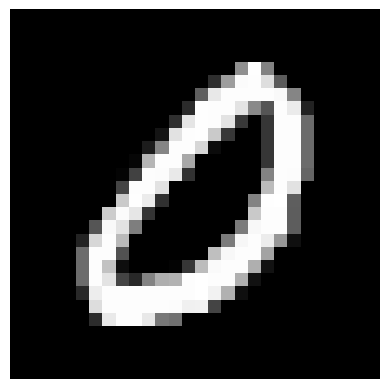

In [3]:
# renderization of a random image 

pixel_data = dfTest.iloc[17,1:].values
image_array = pixel_data.reshape((28,28))

plt.imshow(image_array,cmap = 'gray',vmin = 0,vmax = 255)
plt.axis('off')
plt.show()



In [4]:
# Neural net
import torch
import torch.nn as nn # neural network

Criterion for clasification of images to digits between 0 and 9 -> Cross entropy loss 

-> Probability distribution (values between 0 and 1) between the N different classes/possible outputs
    -> In this case N = 10

Formula:
Loss= -sum[i...N] (yi·log(pi)) 
yi = binary indicator (0 or 1) if label i (0...9) is the correct clasification
pi = predicted possibility for class i



In [5]:
criterion = nn.CrossEntropyLoss()

# manual def

#def criterion(yhat, y):
#    return -torch.mean(torch.sum(y * torch.log(yhat), dim = 1))

In [6]:
# Simple Neural Network:

class digit_rec_NN(nn.Module):
    def __init__(self):
        super(digit_rec_NN, self).__init__()
        self.fc1 = nn.Linear(28*28, 256)  # 28 * 28 is the dimension of the image and 256 is the number of starting neurons -> This layer only flattens the image into 256 values so it can be used by the next layer
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)  # Output layer for 10 classes ( 0 - 9 )
        self.soft = nn.Softmax(dim = 1) # softmax transforms into values between 0 and 1 (Linear could have negative values)
    
    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the image
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.soft(self.fc4(x)) 
        return x

In [7]:
# Prepare Data for training

from torch.utils.data import Dataset, DataLoader
class Data(Dataset):
     # constructor
     def __init__(self, df):
          self.y = torch.tensor(df["label"].values, dtype=torch.long) # y = result (0 - 9 )
          self.x = torch.tensor(df.iloc[:,1:].values,dtype=torch.float32) # x is every pixel column 
          self.len = self.x.shape[0] # saves in len attribute the num of rows on the dataset
          

     def __len__(self):
          return self.len
     
     def __getitem__(self, index):
           return (self.x[index]), (self.y[index]) # returns image array and digit


In [8]:
# Create NN Model

model = digit_rec_NN()

In [9]:
# Prepara Dataset

Dataset = Data(dfTest)
trainloader = DataLoader(Dataset, batch_size=64, shuffle=True)

In [10]:
# Define optimizer 

# Optimizer is what updates the weights and biases of the NN trough gradient descent (SGD)

optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)
#, momentum = 0.0, weight_decay=0.0001, dampening=0, nesterov = True)

# lr = learning rate. Values between 0 and 1. Controls the size of the step that the optimizer takes in the direction of minimizing loss function. Higer value -> faster learning but can cause instability. Lower value -> slower but more stable
# momentum = adds a fraction of the previous update to the current update. Smooths optimization progress. 
# weight decay -> Ads a penalty to the loss function to discourage large weights and prevent overfitting
# dampening -> dampens momentum to make updates more stable
# nesterov (T or F) -> enables Nesterov momentum, which changes how momentum is applied

In [24]:
# training

cycles = 100
running_loss_arr = []

for epoch in range(cycles):
    running_loss = 0.0

    for i,data in enumerate(trainloader,0):
        images,labels = data


        # We set the gradient to Zero
        optimizer.zero_grad()


        #We get production for input x
        outputs = model(images)


        # We calculate the loss for that given input
        loss = criterion(outputs, labels)


        # We do the Stochastic Gradient Descent
        loss.backward() # We calculate the derivative
        optimizer.step() # and advance a step in the gradient with the calculated
        
        #Add running loss
        running_loss += loss.item()
    # check for running_loss each epoch
    avg_loss = running_loss / i
    #print(f"[Epoch {epoch + 1}, Batch {i + 1}] Loss: {avg_loss:.16f}")
    running_loss_arr.append(avg_loss)
    running_loss = 0.0  # Reset running loss

print(running_loss_arr)


[1.4676746418926774, 1.4676743529555274, 1.467674132709096, 1.4676739655253364, 1.467673964616729, 1.4676735377529773, 1.467673435443785, 1.4676732197403908, 1.4676730098520838, 1.4676732415469682, 1.4676727747044913, 1.4677415740926092, 1.4676728204983036, 1.4676725351955833, 1.467743444188339, 1.4677396732859496, 1.4676535427570343, 1.4676518943615076, 1.4676511932800456, 1.4676509979294567, 1.4676511871015154, 1.467650540718218, 1.4676507758658106, 1.4676502096216852, 1.4676504267788515, 1.4676332928058577, 1.467629928232693, 1.4676284183089325, 1.4676280957533092, 1.4676277204984571, 1.4676275509523182, 1.4676274004869345, 1.4676273041745511, 1.467627213677255, 1.4676271418972713, 1.467626871132269, 1.4676269240132191, 1.4676267063108885, 1.4676265956425085, 1.4676263982929834, 1.467626534220649, 1.4676260541125041, 1.4676248892778303, 1.4676230736985438, 1.4676147181449868, 1.4676084889144432, 1.4676070967462005, 1.4676062695500327, 1.467605347676975, 1.4676021108540094, 1.4675875

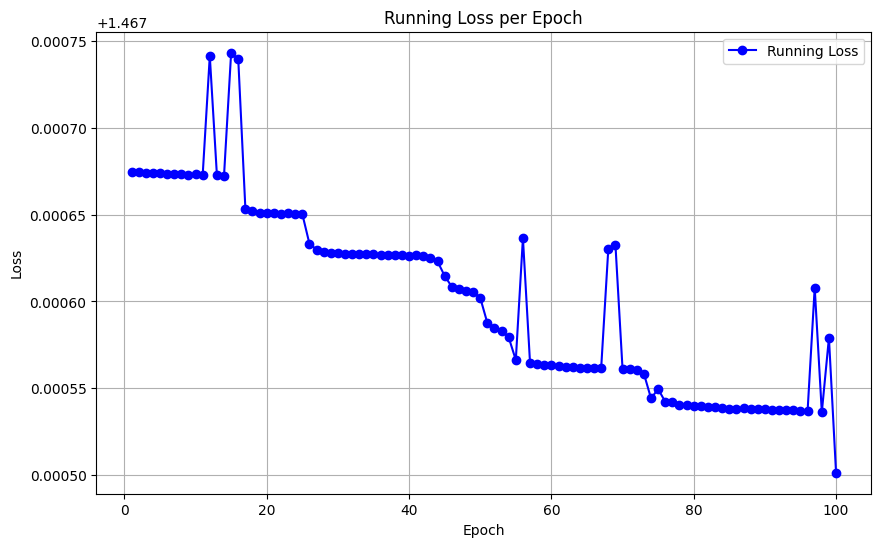

In [26]:
# Check running_loss_arr
# for this we have matplotlib plt

epochs = range(1, len(running_loss_arr) + 1)

# Plot the running loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, running_loss_arr, marker='o', linestyle='-', color='b', label='Running Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Running Loss per Epoch')
plt.legend()
plt.grid(True)
plt.show()



In [19]:
# test acuaracy

df2 = pd.read_csv("..\\Datasets\\test.csv")

# convert dataset into NumPy (excluding first row (labels))

test_data = df2.values[1:]

for image_array in test_data:
    input_tensor = torch.tensor(image_array, dtype=torch.float32)

    predicted_result = model(input_tensor)

    print(torch.argmax(predicted_result, dim = 1).item())
    print(predicted_result)

    #image = image_array.reshape((28,28))
    #plt.imshow(image, cmap='gray',vmin=0,vmax=255)
    #plt.axis('off')
    #plt.show()





0
tensor([[1.0000e+00, 5.4495e-19, 4.1441e-15, 2.5994e-19, 1.6529e-25, 1.2744e-16,
         2.1004e-20, 7.6974e-21, 5.5560e-23, 5.3352e-21]],
       grad_fn=<SoftmaxBackward0>)
9
tensor([[5.0379e-13, 4.1578e-12, 2.0311e-09, 4.5476e-07, 1.9057e-05, 1.0172e-11,
         2.4114e-13, 1.3864e-05, 1.4352e-06, 9.9997e-01]],
       grad_fn=<SoftmaxBackward0>)
9
tensor([[4.8905e-07, 2.3984e-13, 5.4847e-04, 1.2416e-08, 1.8195e-04, 3.2862e-12,
         3.5843e-12, 2.1961e-07, 4.3724e-09, 9.9927e-01]],
       grad_fn=<SoftmaxBackward0>)
3
tensor([[3.6386e-19, 1.2089e-14, 6.7006e-08, 1.0000e+00, 2.6382e-23, 5.1617e-17,
         1.0162e-21, 2.4408e-16, 2.0518e-13, 1.4752e-18]],
       grad_fn=<SoftmaxBackward0>)
7
tensor([[4.0721e-11, 2.9968e-14, 1.6210e-05, 7.3871e-05, 6.8665e-09, 3.9477e-14,
         1.0174e-13, 9.5068e-01, 3.0981e-08, 4.9231e-02]],
       grad_fn=<SoftmaxBackward0>)
0
tensor([[1.0000e+00, 2.0662e-24, 1.6564e-15, 2.9460e-18, 9.1312e-28, 5.7075e-26,
         3.3333e-23, 7.4861e-25,